In [3]:
# Step 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display plots inside notebook
%matplotlib inline

# Some default plot styling
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [4]:
# Step 2: Load the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# Step 3: Preview the data
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'StudentPerformanceFactors.csv'

In [5]:
import os
os.getcwd()


'C:\\Users\\Mavis boateng\\OneDrive\\Documents'

In [6]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
# See first few rows
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [11]:
print("Shape of data:", df.shape)
print("Columns:", df.columns.tolist())


Shape of data: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="StudyHours", y="ExamScore")  # adjust names if different
plt.title("Study Hours vs Exam Score")
plt.show()


ValueError: Could not interpret value `StudyHours` for `x`. An entry with this name does not appear in `data`.

In [13]:
df.columns.tolist()


['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

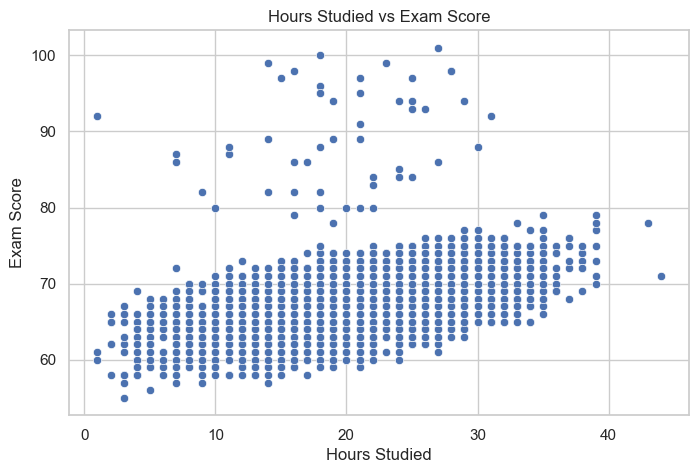

In [14]:
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score")
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


In [15]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [16]:
df = df.dropna()   # easiest way – remove rows with missing data


In [17]:
df.fillna(df.mean(numeric_only=True), inplace=True)


C:\Users\Mavis boateng\AppData\Local\Temp\ipykernel_9724\3157296858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)


In [18]:
df = df.fillna(df.mean(numeric_only=True))


In [19]:
df.isnull().sum()


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict exam scores on test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.3f}")


NameError: name 'model' is not defined

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define your feature (X) and target (y)
X = df[["Hours_Studied"]]
y = df["Exam_Score"]

# Split the dataset again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)


✅ Model trained successfully!
Coefficient (slope): [0.28834271]
Intercept: 61.48999442610166


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 2.53
Root Mean Squared Error (RMSE): 3.51
R-squared (R²): 0.205


In [23]:
# Step 6: Add more features
features = [
    "Hours_Studied",
    "Sleep_Hours",
    "Previous_Scores",
    "Motivation_Level",
    "Attendance"
]

X = df[features]
y = df["Exam_Score"]

# Split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model again
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate again
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"New MAE: {mae:.2f}")
print(f"New RMSE: {rmse:.2f}")
print(f"New R²: {r2:.3f}")


ValueError: could not convert string to float: 'Medium'

In [24]:
# Step 7: Encode categorical (text) features automatically
df_encoded = pd.get_dummies(df, drop_first=True)

# Select only numeric columns for modeling
features = [
    "Hours_Studied",
    "Sleep_Hours",
    "Previous_Scores",
    "Motivation_Level_High",   # new column created by get_dummies()
    "Motivation_Level_Medium",
    "Attendance"
]

# Check available columns to verify names
print(df_encoded.columns.tolist())


['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low', 'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'School_Type_Public', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near', 'Gender_Male']


In [25]:
# Prepare the feature set using encoded data
X = df_encoded[features]
y = df_encoded["Exam_Score"]

# Split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"New MAE: {mae:.2f}")
print(f"New RMSE: {rmse:.2f}")
print(f"New R²: {r2:.3f}")


KeyError: "['Motivation_Level_High'] not in index"

In [26]:
df_encoded.columns.tolist()


['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score',
 'Parental_Involvement_Low',
 'Parental_Involvement_Medium',
 'Access_to_Resources_Low',
 'Access_to_Resources_Medium',
 'Extracurricular_Activities_Yes',
 'Motivation_Level_Low',
 'Motivation_Level_Medium',
 'Internet_Access_Yes',
 'Family_Income_Low',
 'Family_Income_Medium',
 'Teacher_Quality_Low',
 'Teacher_Quality_Medium',
 'School_Type_Public',
 'Peer_Influence_Neutral',
 'Peer_Influence_Positive',
 'Learning_Disabilities_Yes',
 'Parental_Education_Level_High School',
 'Parental_Education_Level_Postgraduate',
 'Distance_from_Home_Moderate',
 'Distance_from_Home_Near',
 'Gender_Male']

In [27]:
features = [
    "Hours_Studied",
    "Sleep_Hours",
    "Previous_Scores",
    "Attendance",
    # Replace these with the exact names from df_encoded
    "Motivation_Level_Low",    
    "Motivation_Level_Medium"
]


In [28]:
X = df_encoded[features]
y = df_encoded["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"New MAE: {mae:.2f}")
print(f"New RMSE: {rmse:.2f}")
print(f"New R²: {r2:.3f}")


New MAE: 1.40
New RMSE: 2.53
New R²: 0.587


C:\Users\Mavis boateng\AppData\Local\Temp\ipykernel_9724\1768863266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")


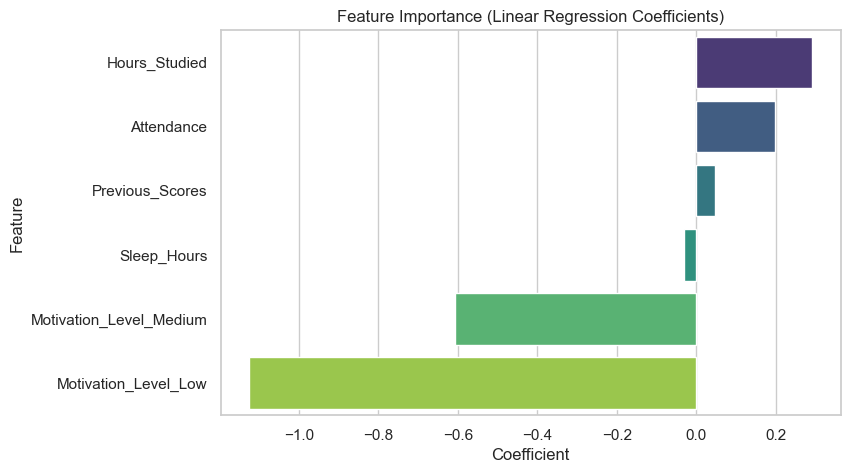

,Feature,Coefficient
0,Hours_Studied,0.292679
3,Attendance,0.198295
2,Previous_Scores,0.046495
1,Sleep_Hours,-0.031145
5,Motivation_Level_Medium,-0.606498
4,Motivation_Level_Low,-1.126514


In [29]:
# Step 9: Visualize feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

coefficients


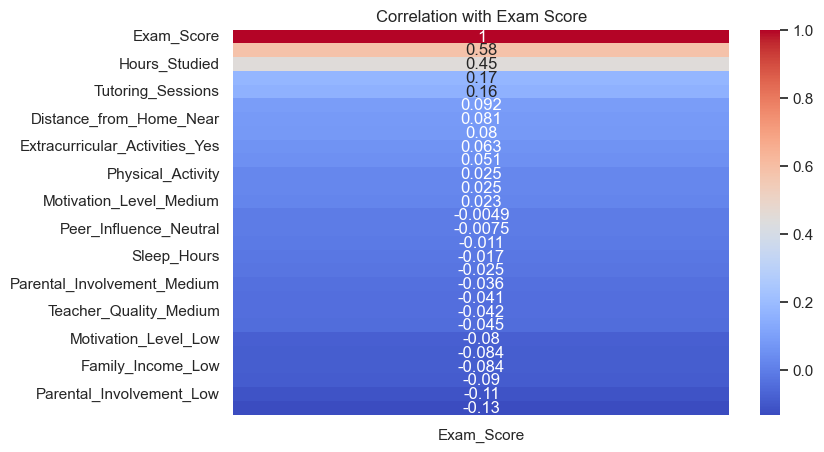

In [30]:
sns.heatmap(df_encoded.corr()[["Exam_Score"]].sort_values(by="Exam_Score", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with Exam Score")
plt.show()


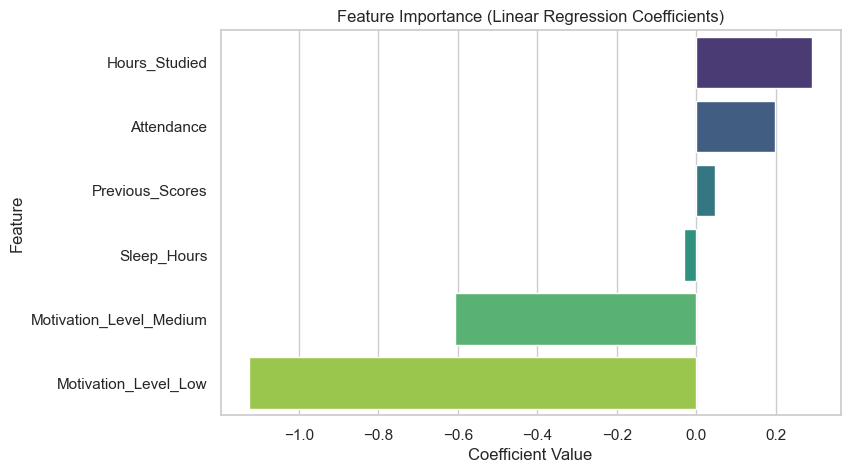

In [31]:
sns.barplot(
    data=coefficients,
    x="Coefficient",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()



In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[["Hours_Studied"]])

# Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Train model
model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)

# Evaluate
y_pred_p = model_poly.predict(X_test_p)
r2_poly = r2_score(y_test_p, y_pred_p)

print(f"Polynomial Regression R²: {r2_poly:.3f}")


Polynomial Regression R²: 0.205
